# Batch Job Analysis -- Data Exploration for Master Batch Job
Draw data exploration diagram for MBJ
1. Line Chart about elapsed time trends in time line
2. Correlation Heat Map for all metrics
3. Boxplot for weekly, monthly pattern discovery


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  #would not show warning message

Definiton of function __*drawJobs(p_df_input,...)*__ 
 - function scales data
 - function plots data

In [2]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer


def DrawJobs(p_df_input,p_index,p_start_date,p_end_date,p_title,p_columns,p_colors,p_scalertype=0):
    DF=p_df_input.copy()
    DF=DF[(DF['date']>=p_start_date) & (DF['date']<=p_end_date)]
    DF.sort_values(by=p_index,inplace=True)
    DF.index=DF[p_index]
    DF.drop([p_index],axis=1,inplace=True)
    
    
    DF1=DF[p_columns]
    if p_scalertype>0:
        DF1=DF1.dropna()
    
    if p_scalertype==1:
        DF2=StandardScaler().fit_transform(DF1)  
    elif (p_scalertype==2):
        DF2=MinMaxScaler().fit_transform(DF1)
    elif (p_scalertype==3):
        DF2=MaxAbsScaler().fit_transform(DF1)
    elif (p_scalertype==4):
        DF2=RobustScaler(quantile_range=(25, 75)).fit_transform(DF1)
    elif (p_scalertype==5):
        DF2=QuantileTransformer(output_distribution='uniform').fit_transform(DF1)
    elif (p_scalertype==6):
        DF2=QuantileTransformer(output_distribution='normal').fit_transform(DF1)
    elif (p_scalertype==7):
        DF2=Normalizer().fit_transform(DF1)
    
    if p_scalertype>0:
        for j in range(len(p_columns)):
            DF1[p_columns[j]]=DF1[p_columns[j]].astype(np.float64)
        r=0
        for index, row in DF1.iterrows():
            for j in range(len(p_columns)):
                row[j]=DF2[r,j]
            r=r+1
    
    plt.figure(figsize=(16,6))
   
    plt.suptitle(p_title+' By '+p_index+' ('+p_start_date.strftime("%Y-%m-%d")+' ~ '+p_end_date.strftime("%Y-%m-%d")+')',fontsize=24)

    ax1=plt.subplot()
    for i in range(len(p_columns)):
        ax1.plot(DF1[p_columns[i]], p_colors[i])
        
    ax1.legend()
    
    plt.xticks(rotation='vertical')
    
    L_DAYS = (pd.to_datetime(p_end_date).date()-pd.to_datetime(p_start_date).date())/\
          (pd.to_datetime('2018-06-02').date()-pd.to_datetime('2018-06-01').date())+1
            
    if L_DAYS<10:
            MAJOR_TICKS = np.arange(pd.to_datetime(p_start_date).date(),
                                pd.to_datetime(p_end_date).date()+relativedelta(days=1) , 
                                relativedelta(days=1))
    else:
        if L_DAYS<=20:
            MAJOR_TICKS = np.arange(pd.to_datetime(p_start_date).date(),
                                pd.to_datetime(p_end_date).date()+relativedelta(days=1) , 
                                relativedelta(days=2))
        else:
            MAJOR_TICKS = np.arange(pd.to_datetime(p_start_date).date(),
                                pd.to_datetime(p_end_date).date()+relativedelta(days=1) , 
                                relativedelta(days=31))

    ax1.set_xticks(MAJOR_TICKS)
    
    ax1.set_xlabel('Date', fontsize = 16)
    
    plt.grid(color='white', linestyle='-', linewidth=1)
    
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    
    return

  


/home/mlzdev/mlz/mlz120_install_spark4/imlpython/env/ying37/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [3]:
  
import pandas as pd
import numpy.random as rnd
import seaborn as sns

def DrawAll(df_join,p_title):
    df_join['date']=df_join['DATE'].apply(lambda s:pd.to_datetime(s)) 

    DrawJobs(df_join,'date',pd.to_datetime('2016-01-01'),pd.to_datetime('2016-12-31'),p_title+':',['ELAPSED_MINUTE'],\
         ['r'],0)
    


    fig, ax = plt.subplots(figsize=(16, 12))
    
    L_COLS = [ 'ELAPSED_MINUTE', 'MONTH', 'DAY',
       'WEEKDAY', 'IS_WEEKEND', 'IS_MONTHEND', 'IS_HOLIDAY',  'BT01', 'BT02', 'BT03',
       'BT04', 'BT05', 'BT06', 'BT07', 'BT08', 'BT09', 'BT10', 'BT11', 'BT12',
       'BT13', 'BT14', 'BT15', 'BT16']
    sns.heatmap(df_join[L_COLS].corr(), annot=True, vmax=1, square=True, 
            cmap="coolwarm",fmt=".1f",ax=ax)
    plt.suptitle(p_title)
    plt.show()


    DF1=df_join[['MONTH','WEEKDAY','DAY','ELAPSED_MINUTE']]

    plt.figure(figsize=(24,12))
    plt.suptitle(p_title)

    ax1=plt.subplot(311)
    ax2=plt.subplot(312)
    ax3=plt.subplot(313)

    sns.boxplot(x='MONTH', y="ELAPSED_MINUTE",  data=DF1,ax=ax1,color='lightblue')
    sns.boxplot(x='DAY', y="ELAPSED_MINUTE",  data=DF1,ax=ax2,color='lightgreen')
    sns.boxplot(x='WEEKDAY', y="ELAPSED_MINUTE",  data=DF1,ax=ax3,color='lightgrey')



# Read data file from Dataset in MLz

Get project context 
1. Move text edit caret into begining of below cell
2. Click the button in upright menu, with hint of "Create new"
3. Select "Insert project context"
4. Use new generated code to replace old code in the cell

In [4]:
#!!Notes:# Please Prepare the project environment manualy,  click the pull-down menu (v) of the Create new (+) tool and select "Insert project context".
########## The project context is like this:
########## pc = ProjectContext.ProjectContext('Batch_Job_Analytics', '2_BatchJob_MBJ_DataExploration', '***', 'xx.xx.xx.xx')


In [5]:
JOB_FILE = dsx_core_utils.get_local_dataset(pc, 'MasterBatchJob.csv')
CALENDAR_FILE = dsx_core_utils.get_local_dataset(pc, 'calendar_join.csv')
TXN_FILE = dsx_core_utils.get_local_dataset(pc, 'TxnVolume.csv')
WIDETABLE_FILE=dsx_core_utils.get_local_dataset(pc, 'widetable_MBJ.csv')

In [6]:
DF_JOB = pd.read_csv(JOB_FILE)
DF_CALENDAR=pd.read_csv(CALENDAR_FILE)
DF_TXN=pd.read_csv(TXN_FILE)

DF_JOIN=DF_JOB.merge(DF_CALENDAR,how='inner',left_on='START_DATE',right_on='NEXTDAY')\
    .merge(DF_TXN,how='inner',left_on='DATE',right_on='DATE')

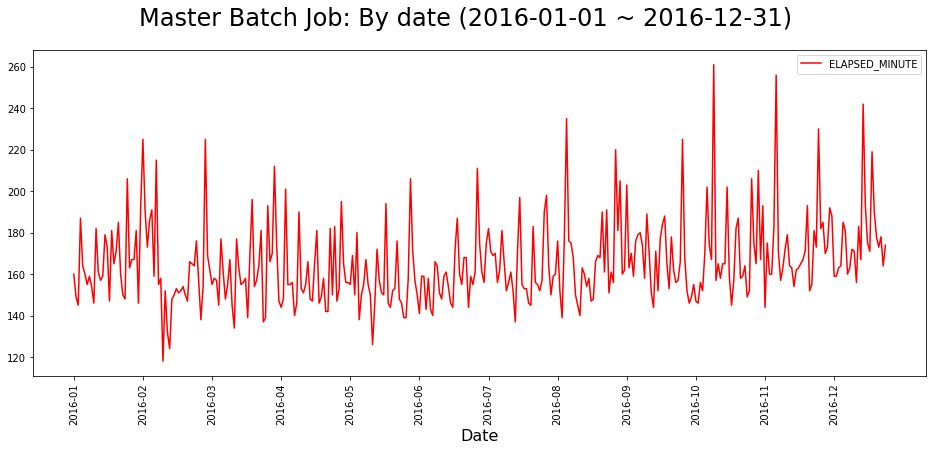

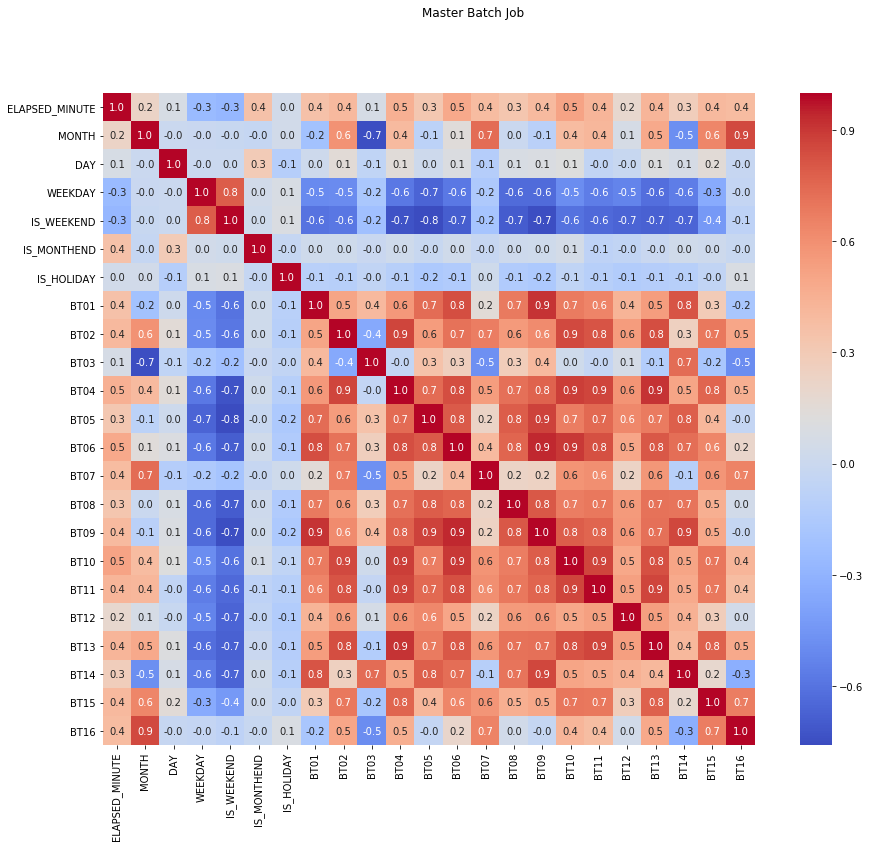

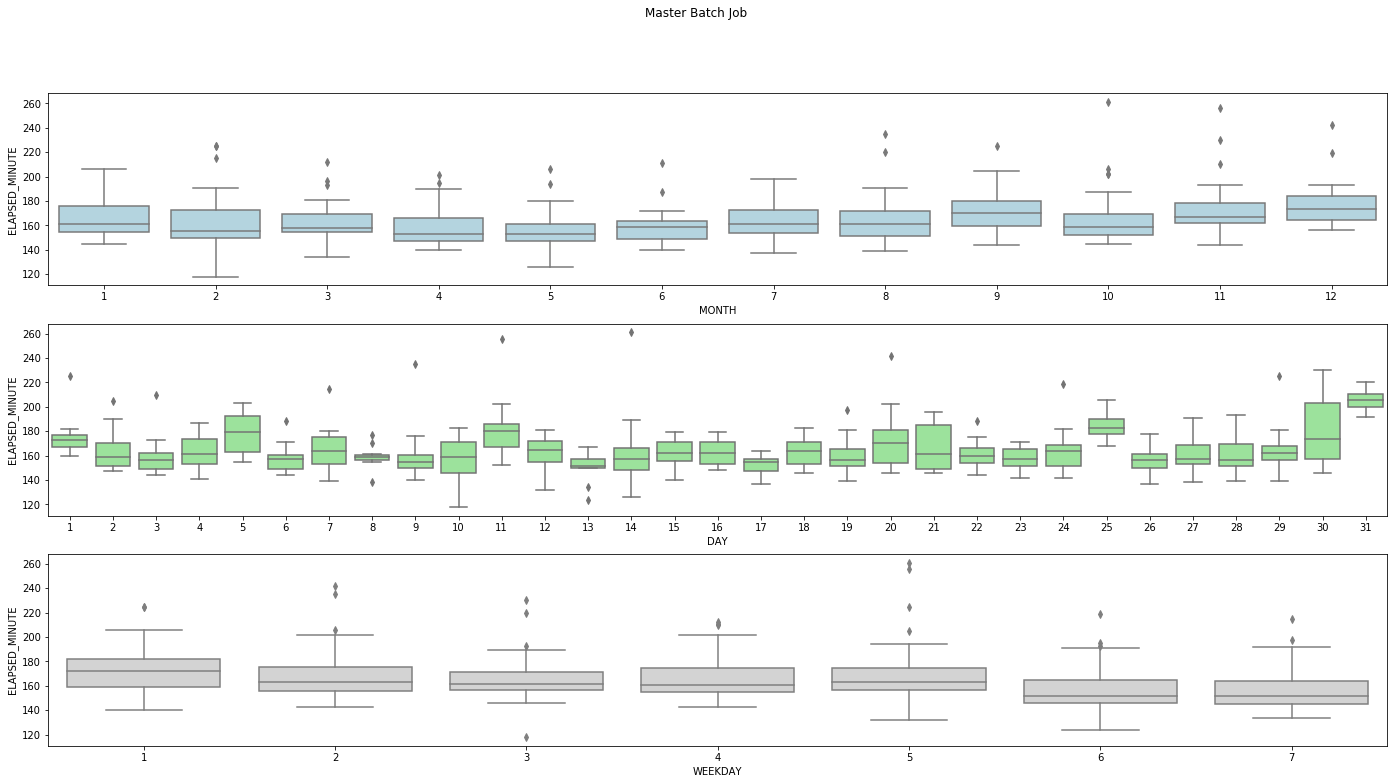

In [7]:
DrawAll(DF_JOIN,'Master Batch Job')


### Next Action:
    Save joined widetable for further prediction on Elapsed Time
    


In [8]:
print(DF_JOIN.columns)
DF_JOIN.to_csv(WIDETABLE_FILE,index=False)

Index(['START_DATE', 'ELAPSED_MINUTE', 'DATE', 'YEAR', 'MONTH', 'DAY',
       'WEEKDAY', 'IS_WEEKEND', 'IS_MONTHEND', 'NEXTDAY', 'LASTDAY',
       'REFER_DATE', 'IS_HOLIDAY', 'IS_SPECIALDAY', 'BT01', 'BT02', 'BT03',
       'BT04', 'BT05', 'BT06', 'BT07', 'BT08', 'BT09', 'BT10', 'BT11', 'BT12',
       'BT13', 'BT14', 'BT15', 'BT16', 'date'],
      dtype='object')
